In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# Import the numpy and pandas package
import numpy as np
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.DataFrame(pd.read_csv("zillow.csv"))

In [3]:
df.head()

,zpid,rawHomeStatusCd,marketingStatusSimplifiedCd,imgSrc,hasImage,detailUrl,statusType,statusText,price,priceLabel,...,buildingId,isBuilding,canSaveBuilding,isCdpResult,style,unitCount,isComingSoonCommunity,lotId,variableData.type,variableData.text
0,13034403.0,ForSale,For Sale by Agent,https://photos.zillowstatic.com/fp/18d60c54d4a...,True,/homedetails/1132-Kingston-St-Aurora-CO-80010/...,FOR_SALE,House for sale,"$375,000",$375K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,247388652.0,ForSale,For Sale by Agent,https://photos.zillowstatic.com/fp/39deae31418...,True,/homedetails/3568-Central-Park-Blvd-Denver-CO-...,FOR_SALE,Townhouse for sale,"$323,622",$324K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,337664610.0,ForSale,For Sale by Agent,https://photos.zillowstatic.com/fp/a52d0974a9f...,True,/homedetails/2670-Arapahoe-St-Denver-CO-80205/...,FOR_SALE,Townhouse for sale,"$323,000",$323K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68047903.0,ForSale,For Sale by Agent,https://photos.zillowstatic.com/fp/439e223ed32...,True,/homedetails/21376-E-55th-Pl-Denver-CO-80249/6...,FOR_SALE,House for sale,"$370,040",$370K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13077301.0,ForSale,For Sale by Agent,https://photos.zillowstatic.com/fp/d2d6be4ed6d...,True,/homedetails/2239-S-Truckee-St-Aurora-CO-80013...,FOR_SALE,House for sale,"$519,000",$519K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(502, 100)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 100 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   zpid                                                 498 non-null    float64
 1   rawHomeStatusCd                                      498 non-null    object 
 2   marketingStatusSimplifiedCd                          498 non-null    object 
 3   imgSrc                                               502 non-null    object 
 4   hasImage                                             499 non-null    object 
 5   detailUrl                                            502 non-null    object 
 6   statusType                                           502 non-null    object 
 7   statusText                                           500 non-null    object 
 8   price                                                502 non-null    

zpid = unique id
detailUrl = url to home
price = objective of analysis
address = address
beds
baths
area
timeonZillow
latLong.latitude
latLong.longitude
hdpData.homeInfo.zipcode
hdpData.homeInfo.homeType
hdpData.homeInfo.zestimate
hdpData.homeInfo.taxAssessedValue



In [6]:
categories = ['zpid',
'detailUrl',
'price',
'address',
'hdpData.homeInfo.city',
'beds',
'baths',
'area',
'timeOnZillow',
'latLong.latitude',
'latLong.longitude',
'hdpData.homeInfo.zipcode',
'hdpData.homeInfo.homeType',
'hdpData.homeInfo.zestimate',
'hdpData.homeInfo.taxAssessedValue']

In [7]:
denver = df[df.columns.intersection(categories)]

In [8]:
denver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   zpid                               498 non-null    float64
 1   detailUrl                          502 non-null    object 
 2   price                              502 non-null    object 
 3   address                            500 non-null    object 
 4   beds                               498 non-null    float64
 5   baths                              498 non-null    float64
 6   area                               498 non-null    float64
 7   timeOnZillow                       500 non-null    float64
 8   latLong.latitude                   502 non-null    float64
 9   latLong.longitude                  502 non-null    float64
 10  hdpData.homeInfo.zipcode           498 non-null    float64
 11  hdpData.homeInfo.city              498 non-null    object 

In [9]:
denver.head()

,zpid,detailUrl,price,address,beds,baths,area,timeOnZillow,latLong.latitude,latLong.longitude,hdpData.homeInfo.zipcode,hdpData.homeInfo.city,hdpData.homeInfo.homeType,hdpData.homeInfo.zestimate,hdpData.homeInfo.taxAssessedValue
0,13034403.0,/homedetails/1132-Kingston-St-Aurora-CO-80010/...,"$375,000","1132 Kingston Street, Aurora, CO 80010",3.0,2.0,1932.0,4.592780e+08,39.733616,-104.858630,80010.0,Aurora,SINGLE_FAMILY,382800.0,405000.0
1,247388652.0,/homedetails/3568-Central-Park-Blvd-Denver-CO-...,"$323,622","3568 Central Park Boulevard, Denver, CO 80238",3.0,3.0,1605.0,8.615110e+08,39.766560,-104.890100,80238.0,Denver,TOWNHOUSE,323000.0,304300.0
2,337664610.0,/homedetails/2670-Arapahoe-St-Denver-CO-80205/...,"$323,000","2670 Arapahoe Street, Denver, CO 80205",3.0,2.0,1138.0,1.158825e+09,39.757732,-104.982574,80205.0,Denver,TOWNHOUSE,317600.0,314000.0
3,68047903.0,/homedetails/21376-E-55th-Pl-Denver-CO-80249/6...,"$370,040","21376 E 55th Place, Denver, CO 80249",3.0,3.0,1509.0,2.728251e+09,39.796684,-104.739204,80249.0,Denver,SINGLE_FAMILY,NaN,344600.0
4,13077301.0,/homedetails/2239-S-Truckee-St-Aurora-CO-80013...,"$519,000","2239 S Truckee Street, Aurora, CO 80013",3.0,2.0,2238.0,2.437000e+07,39.675514,-104.778760,80013.0,Aurora,SINGLE_FAMILY,NaN,528600.0


In [10]:
denver.describe()

,zpid,beds,baths,area,timeOnZillow,latLong.latitude,latLong.longitude,hdpData.homeInfo.zipcode,hdpData.homeInfo.zestimate,hdpData.homeInfo.taxAssessedValue
count,4.980000e+02,498.000000,498.000000,498.000000,5.000000e+02,502.000000,502.000000,498.000000,277.000000,477.000000
mean,9.848157e+07,3.399598,2.552209,1806.230924,3.216566e+09,39.755505,-104.893170,80125.128514,469267.148014,470800.639413
std,3.084910e+08,0.642993,0.620155,503.088974,6.274288e+09,0.100406,0.145124,138.628709,64457.482084,79925.757084
min,1.294253e+07,3.000000,2.000000,809.000000,6.037000e+06,39.565760,-105.336560,80002.000000,292900.000000,48000.000000
25%,1.306410e+07,3.000000,2.000000,1434.250000,4.771880e+08,39.672111,-105.016235,80014.000000,431400.000000,422900.000000
50%,1.332796e+07,3.000000,2.000000,1730.000000,1.587982e+09,39.741177,-104.870220,80031.000000,479400.000000,482834.000000
75%,5.888865e+07,4.000000,3.000000,2081.750000,3.434785e+09,39.844182,-104.792234,80224.000000,517600.000000,524520.000000
max,2.096283e+09,7.000000,5.000000,3535.000000,5.728743e+10,39.974854,-104.223030,80640.000000,609600.000000,644300.000000


In [11]:
denver.isnull().sum()*100/denver.shape[0]

zpid                                  0.796813
detailUrl                             0.000000
price                                 0.000000
address                               0.398406
beds                                  0.796813
baths                                 0.796813
area                                  0.796813
timeOnZillow                          0.398406
latLong.latitude                      0.000000
latLong.longitude                     0.000000
hdpData.homeInfo.zipcode              0.796813
hdpData.homeInfo.city                 0.796813
hdpData.homeInfo.homeType             0.796813
hdpData.homeInfo.zestimate           44.820717
hdpData.homeInfo.taxAssessedValue     4.980080
dtype: float64

In [12]:
denver['price'] = denver['price'].str.replace('From', '').str.replace(',', '').str.replace('$', '').astype(int)

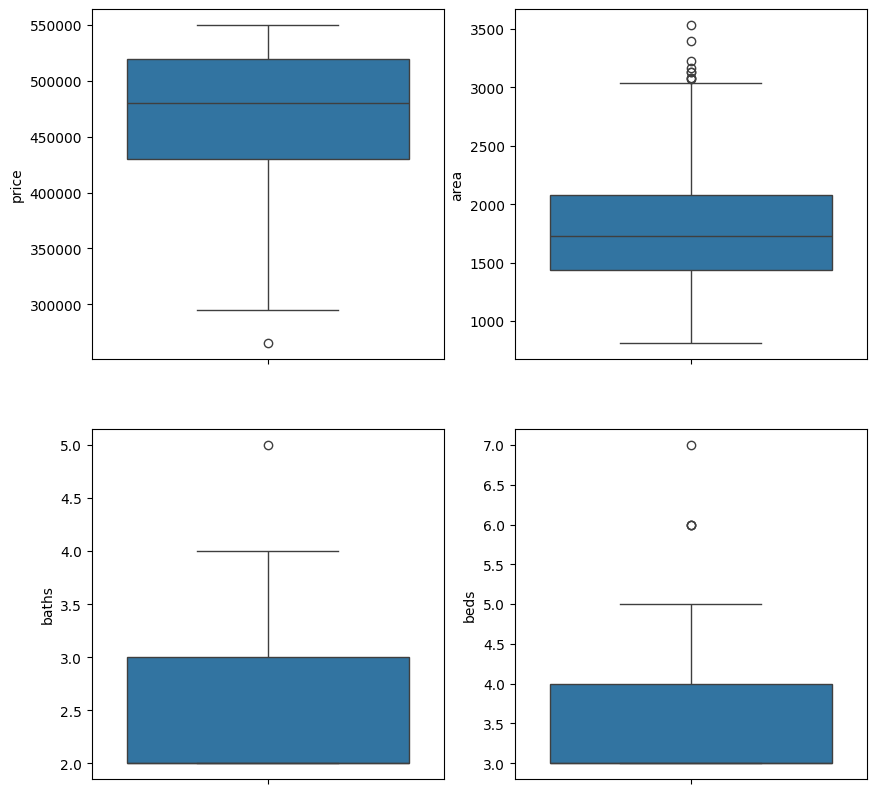

In [13]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,10))
plt1 = sns.boxplot(denver['price'], ax = axs[0,0])
plt2 = sns.boxplot(denver['area'], ax = axs[0,1])
plt3 = sns.boxplot(denver['baths'], ax = axs[1,0])
plt1 = sns.boxplot(denver['beds'], ax = axs[1,1])



In [14]:
denver_compare = denver[['price','beds','baths','area','timeOnZillow','hdpData.homeInfo.zipcode']]

In [15]:
denver_compare.isnull().sum(axis = 0)

price                       0
beds                        4
baths                       4
area                        4
timeOnZillow                2
hdpData.homeInfo.zipcode    4
dtype: int64

In [16]:
denver_compare = denver_compare.dropna(thresh=3)

In [17]:
denver_compare.isnull().sum(axis = 0)

price                       0
beds                        0
baths                       0
area                        0
timeOnZillow                0
hdpData.homeInfo.zipcode    0
dtype: int64

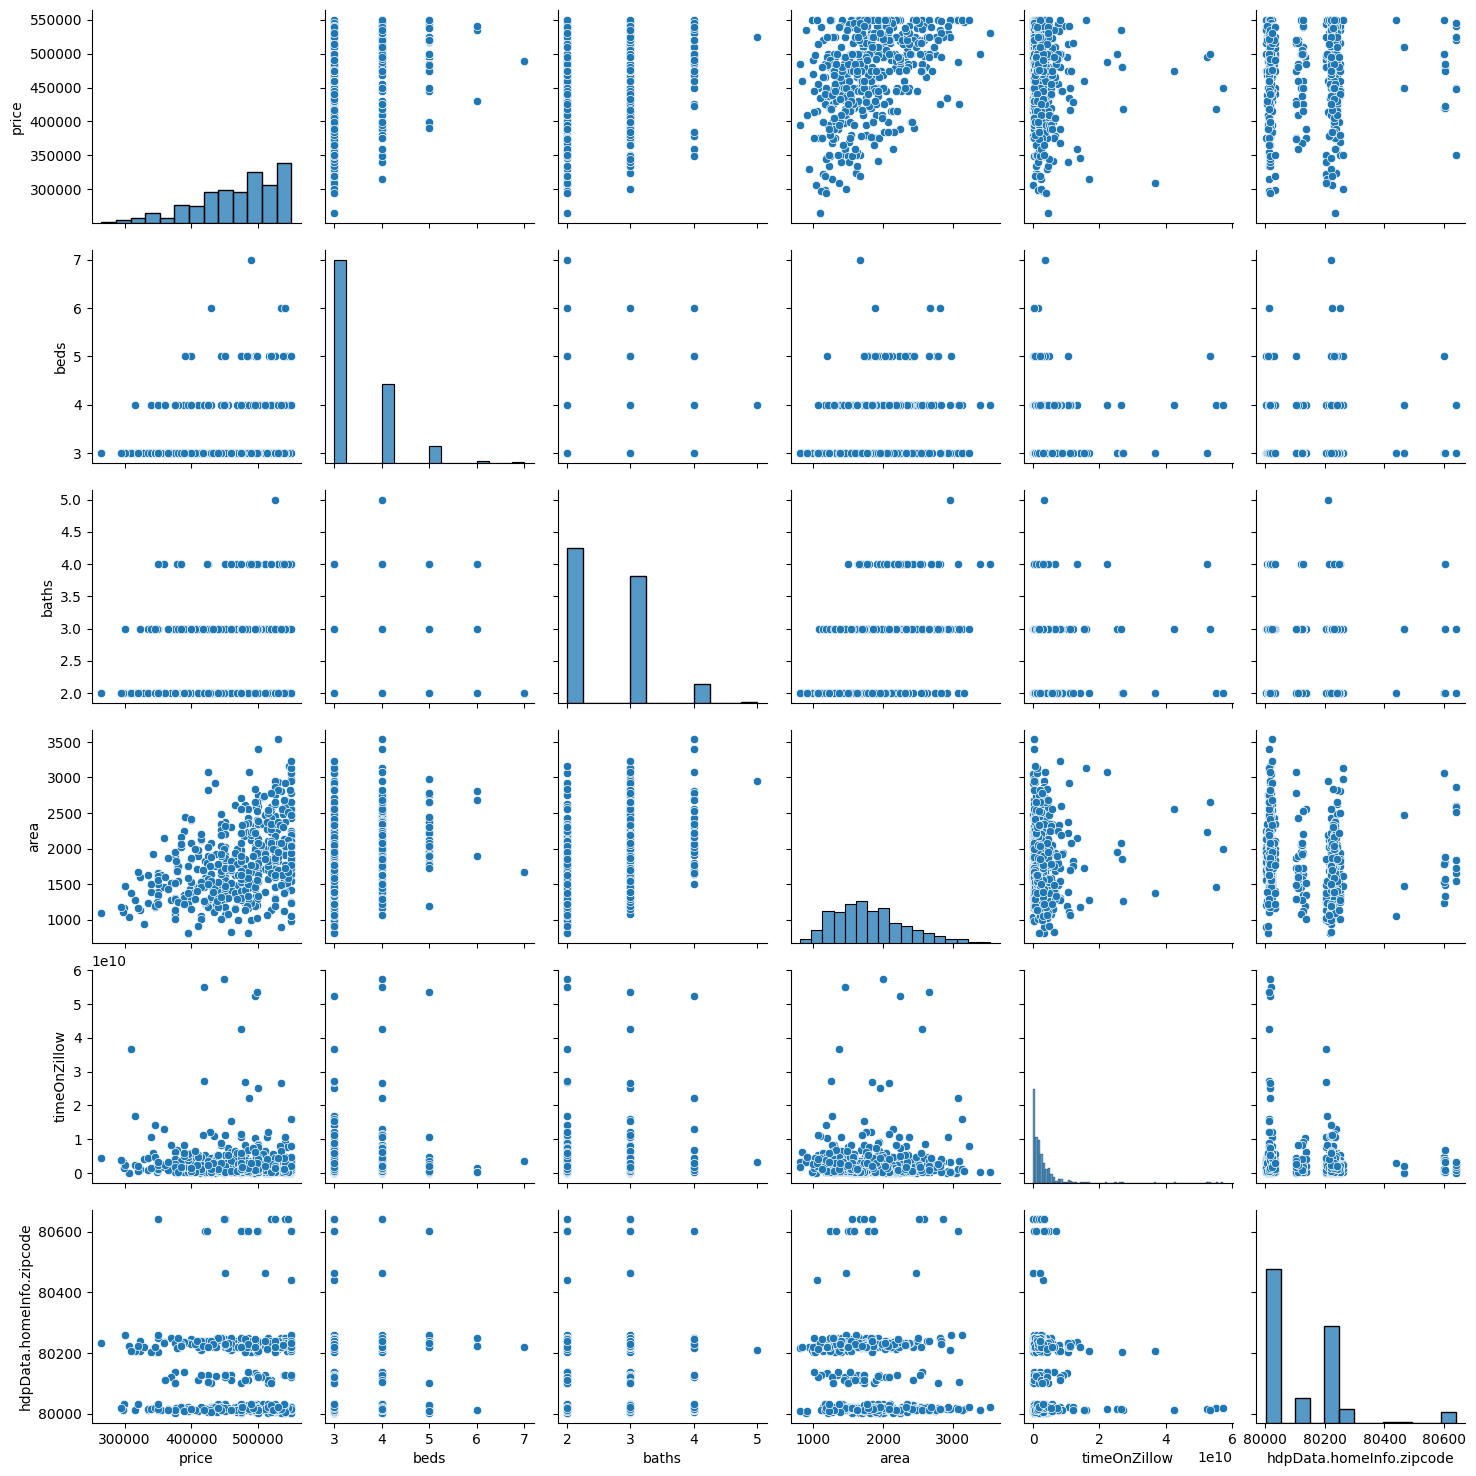

In [18]:
sns.pairplot(denver_compare)
plt.show()

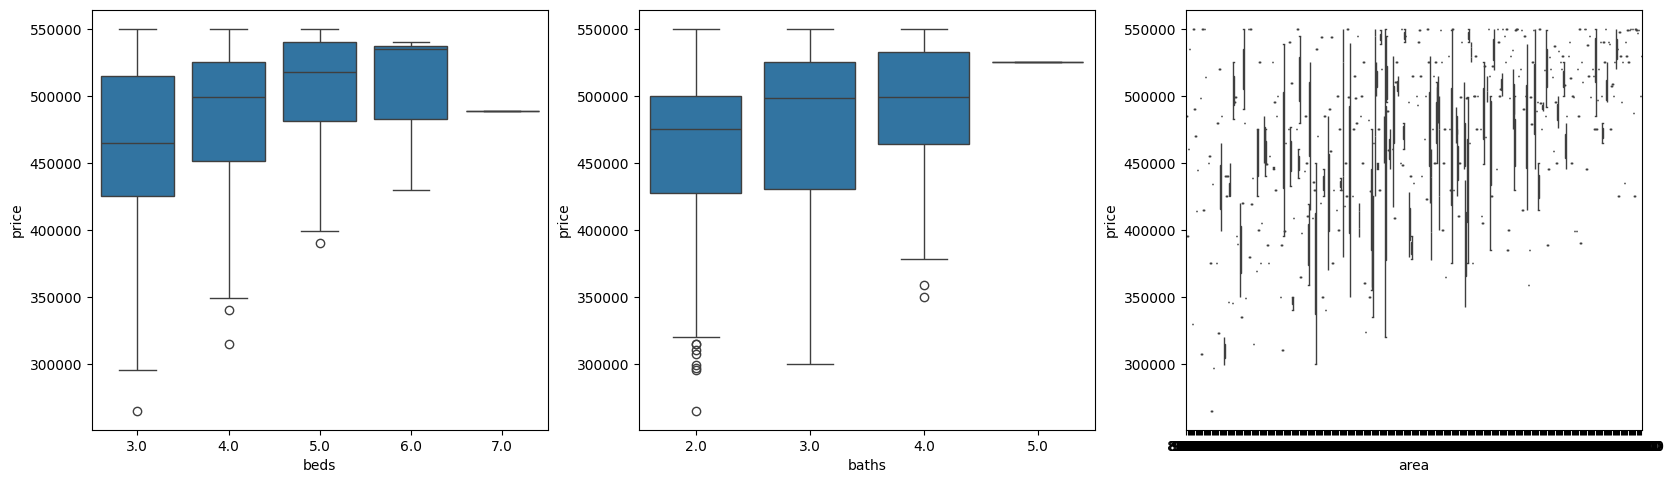

In [19]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'beds', y = 'price', data = denver)
plt.subplot(2,3,2)
sns.boxplot(x = 'baths', y = 'price', data = denver)
plt.subplot(2,3,3)
sns.boxplot(x = 'area', y = 'price', data = denver)


plt.show()

In [39]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(denver_compare, train_size = 0.8, test_size = 0.2, random_state = 78)

In [40]:
df_train.describe()

,price,beds,baths,area,timeOnZillow,hdpData.homeInfo.zipcode
count,398.000000,398.000000,398.000000,398.000000,3.980000e+02,398.000000
mean,467622.384422,3.402010,2.555276,1798.371859,3.388984e+09,80126.070352
std,62588.774280,0.657601,0.631427,501.521300,6.666223e+09,137.343875
min,265000.000000,3.000000,2.000000,812.000000,6.037000e+06,80002.000000
25%,429900.000000,3.000000,2.000000,1413.750000,5.261445e+08,80014.000000
50%,476500.000000,3.000000,2.000000,1741.000000,1.653851e+09,80031.000000
75%,519999.750000,4.000000,3.000000,2081.000000,3.496825e+09,80225.500000
max,550000.000000,7.000000,5.000000,3535.000000,5.728743e+10,80640.000000


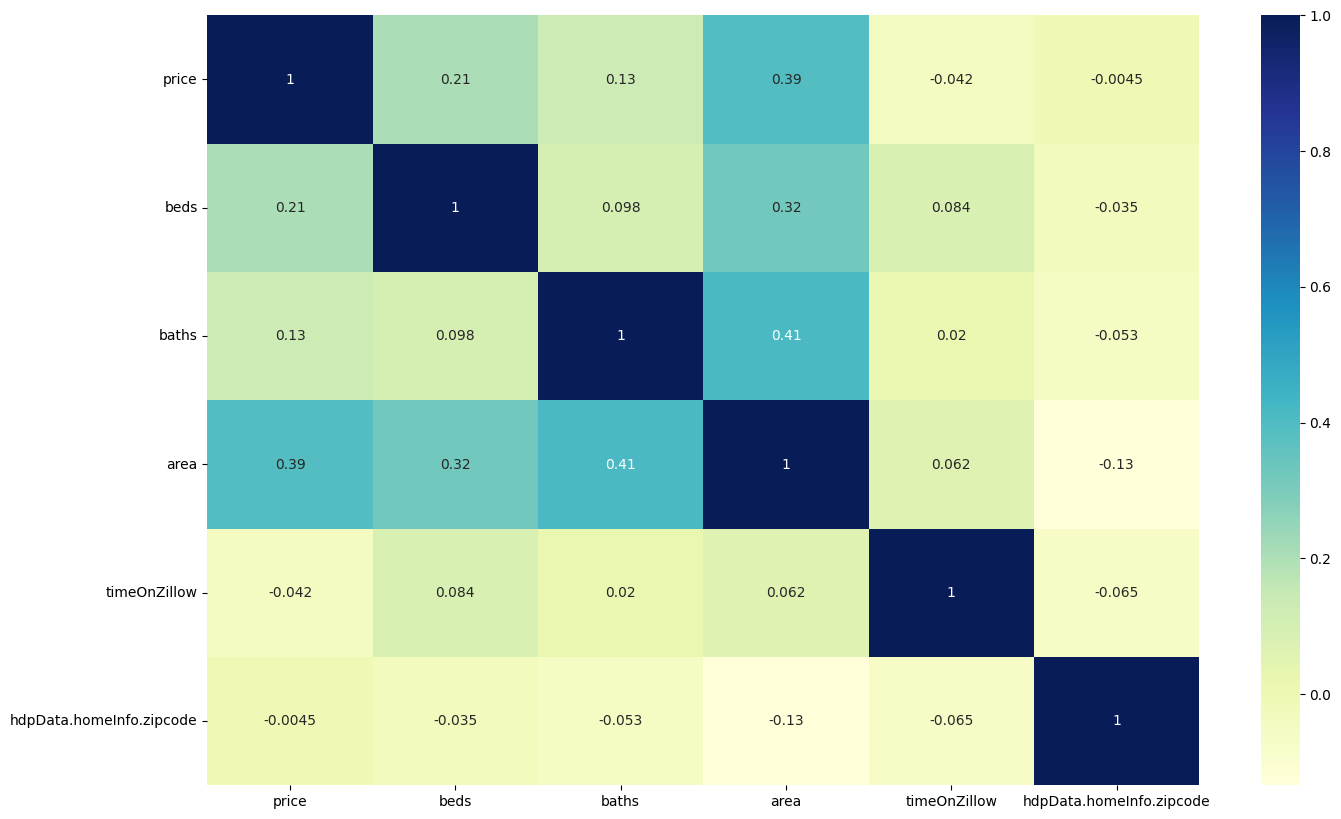

In [41]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [42]:
y_train = df_train.pop('price')
X_train = df_train

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [44]:
X_train.isnull().sum(axis = 0)

beds                        0
baths                       0
area                        0
timeOnZillow                0
hdpData.homeInfo.zipcode    0
dtype: int64

In [45]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [49]:
rfe = RFE(lm, n_features_to_select = 4, step = 1)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [50]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('beds', True, 1),
 ('baths', True, 1),
 ('area', True, 1),
 ('timeOnZillow', False, 2),
 ('hdpData.homeInfo.zipcode', True, 1)]

In [51]:
col = X_train.columns[rfe.support_]
col

Index(['beds', 'baths', 'area', 'hdpData.homeInfo.zipcode'], dtype='object')

In [52]:
X_train.columns[~rfe.support_]

Index(['timeOnZillow'], dtype='object')

In [53]:
X_train_rfe = X_train[col]

In [54]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [55]:
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [56]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     19.34
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           1.54e-14
Time:                        23:18:32   Log-Likelihood:                -4924.1
No. Observations:                 398   AIC:                             9858.
Df Residuals:                     393   BIC:                             9878.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,348085.32
3,area,1.36
2,baths,1.21
1,beds,1.12
4,hdpData.homeInfo.zipcode,1.02


In [59]:
y_train_price = lm.predict(X_train_rfe)

In [60]:
res = (y_train_price - y_train)

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

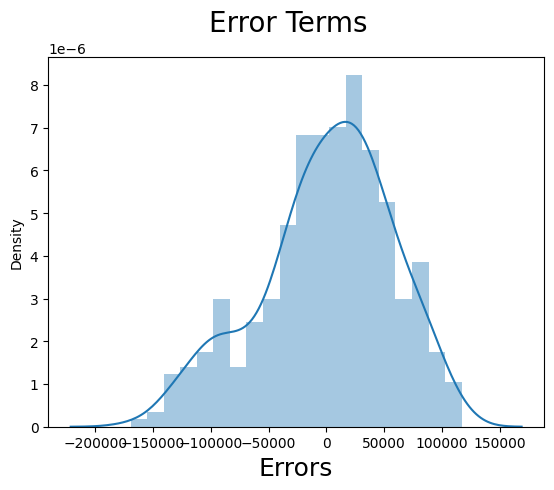

In [62]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)    

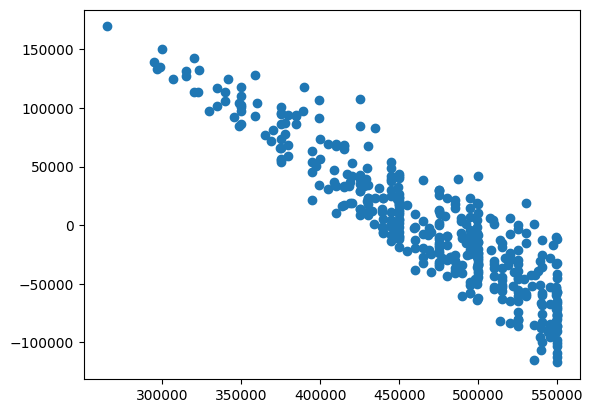

In [63]:
plt.scatter(y_train,res)
plt.show()

In [64]:
y_test = df_test.pop('price')
X_test = df_test

In [65]:
X_test = sm.add_constant(X_test)

In [66]:
X_test_rfe = X_test[X_train_rfe.columns]

In [67]:
y_pred = lm.predict(X_test_rfe)

In [69]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.22341224924927572

Text(0, 0.5, 'y_pred')

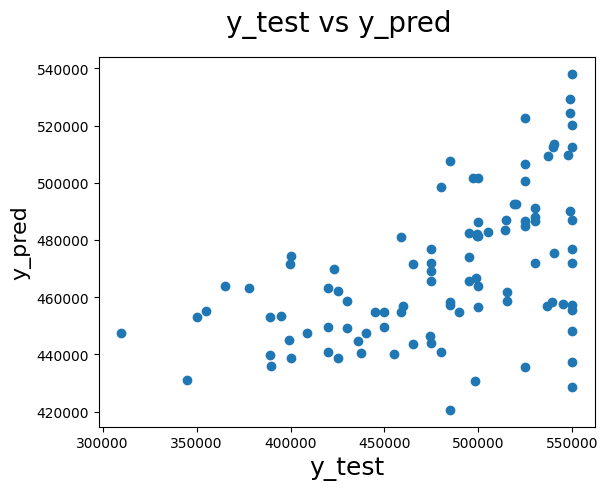

In [70]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)            
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)                         